In [1]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [2]:
df = pd.read_csv("D:/datasetGold.csv", index_col = 'Date', parse_dates = True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,1155.2,1160.8,1146.5,1160.4,1160.4,52
2017-01-04,1156.3,1165.0,1156.3,1163.8,1163.8,36
2017-01-05,1172.0,1183.3,1171.5,1179.7,1179.7,500
2017-01-06,1176.5,1176.5,1171.9,1171.9,1171.9,16
2017-01-09,1173.9,1183.6,1173.0,1183.5,1183.5,62
...,...,...,...,...,...,...
2021-12-27,1810.0,1812.1,1807.0,1808.1,1808.1,150
2021-12-28,1812.0,1818.0,1805.5,1810.2,1810.2,146
2021-12-29,1803.2,1805.1,1791.4,1805.1,1805.1,623


In [3]:
df['Time'] = np.arange(len(df.index))
df


,Open,High,Low,Close,Adj Close,Volume,Time
Date,,,,,,,
2017-01-03,1155.2,1160.8,1146.5,1160.4,1160.4,52,0
2017-01-04,1156.3,1165.0,1156.3,1163.8,1163.8,36,1
2017-01-05,1172.0,1183.3,1171.5,1179.7,1179.7,500,2
2017-01-06,1176.5,1176.5,1171.9,1171.9,1171.9,16,3
2017-01-09,1173.9,1183.6,1173.0,1183.5,1183.5,62,4
...,...,...,...,...,...,...,...
2021-12-27,1810.0,1812.1,1807.0,1808.1,1808.1,150,1231
2021-12-28,1812.0,1818.0,1805.5,1810.2,1810.2,146,1232
2021-12-29,1803.2,1805.1,1791.4,1805.1,1805.1,623,1233


In [4]:
df['Time'] = np.arange(len(df.index))

In [5]:
from sklearn.linear_model import LinearRegression
x = df.loc[:, ['Time']]  # features
y = df.loc[:, 'Close']  # target

# Train the model
model = LinearRegression()
model.fit(x, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(x), index=x.index)

In [6]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.Close[:round(len(df)*0.8)]
test = df.Close[round(len(df)*0.8):]

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1995)

In [8]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

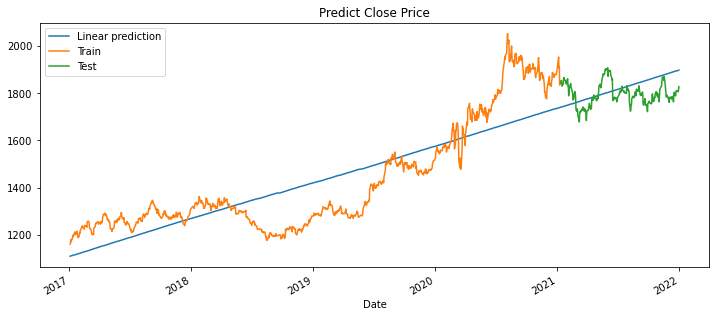

In [9]:
plt.figure(figsize = (12,5))
plt.title('Predict Close Price')
y_pred.plot(label = 'Linear prediction')
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.legend(loc = 'upper left')
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [11]:
mse =  mean_squared_error(y_test, test)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_test, test)
print("RMSE: ", rmse)
print("MAPE: ", mape * 100)

RMSE:  386.67597499150054
MAPE:  24.171161331089234
